In [97]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [98]:
symbols = ['o', 'v', 'x']
colors = [
"#d73027",
"#91bfdb",
"#4575b4"]

In [99]:
def read_file(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()
    rates = []
    latencies = []
    
    for i in range(0, len(lines),2):
        rate = float(lines[i].split(":")[1].strip())
        latency = float(lines[i+1].split(":")[1].strip().split('ms')[0])
        rates.append(rate)
        latencies.append(latency)
    return rates, latencies

In [100]:
systems = ["parrot", "parrot_pa", "baseline"]
files = ["parrot.txt", "parrot_pa.txt", "baseline.txt"]
labels = ["Parrot", "Parrot w/ PagedAttention", "Baseline (vLLM)"]
data = {}
for i, s in enumerate(systems):
    data[s] = {"rates": [], "latencies": []}
    data[s]["rates"], data[s]["latencies"] = read_file(files[i])

In [101]:
print(data)

{'parrot': {'rates': [1.0, 2.0, 4.0, 6.0, 8.0, 16.0, 32.0], 'latencies': [31.96, 34.67, 42.88, 67.94, 109.54, 328.98, 564.31]}, 'parrot_pa': {'rates': [0.5, 1.0, 2.0, 3.0, 4.0, 6.0], 'latencies': [41.79, 59.06, 78.59, 114.64, 146.16, 305.19]}, 'baseline': {'rates': [0.25, 0.5, 1.0, 2.0], 'latencies': [47.05, 55.92, 206.74, 546.8]}}


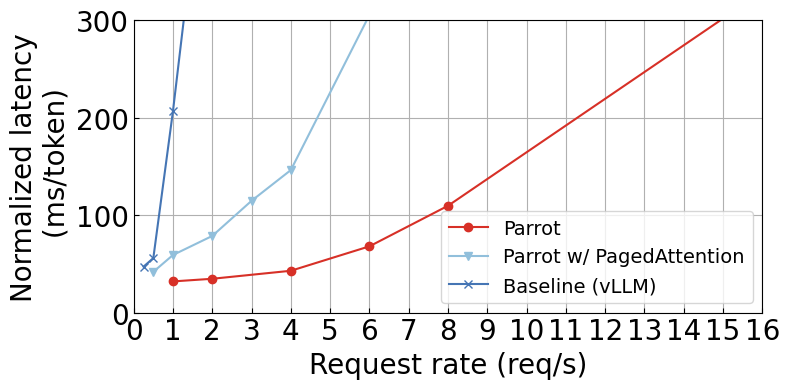

In [103]:

# Initialize the plot
fig, ax = plt.subplots(1, 1, figsize=(8,4))

# Loop through the items in the dictionary to plot each set of rates and latencies
for i, (label, values) in enumerate(data.items()):
    plt.plot(values['rates'], values['latencies'], color=colors[i], marker=symbols[i], label=labels[i])

plt.grid(True)
# Labeling the axes
plt.xlabel('Request rate (req/s)', fontsize=20)
plt.ylabel('Normalized latency\n (ms/token)', fontsize=20)
ax.tick_params(axis='y', labelsize=20, direction='in')
ax.tick_params(axis='x', labelsize=20, direction='in')


# Optionally, you can add a title to the plot
plt.xlim([0,16])
# Show the plot
plt.ylim([0,300])
plt.xticks([_ for _ in range(17)]) # [0,2,4,6,8,10,12,14,16]
# plt.yticks([20,40,60,80,100,120,140,160,180, 200])

# Adding a legend to distinguish the different lines
plt.legend(loc='lower right', prop = { "size": 14 })
plt.tight_layout()
plt.savefig('gpts.pdf')
